In [5]:
import random

with open("data/sample_data.csv", "w", newline="") as f:
    f.write("id,group,score,age\n")
    for i in range(1, 101):
        group = random.choice(["A", "B"])        # グループは "A" または "B"
        score = random.randint(60, 100)            # scoreは60～100の整数
        age = random.randint(20, 40)               # ageは20～40の整数
        f.write(f"{i},{group},{score},{age}\n")
print("sample_data.csv ファイルが50行分のランダムなデータで作成されました。")

sample_data.csv ファイルが50行分のランダムなデータで作成されました。


In [6]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

print("ライブラリの読み込み完了!")

ライブラリの読み込み完了!


In [9]:
# サンプルCSVの読み込み例
df = pd.read_csv('data/sample_data.csv')
display(df)

,id,group,score,age
0,1,A,62,37
1,2,A,73,22
2,3,B,64,32
3,4,B,65,33
4,5,B,72,21
...,...,...,...,...
95,96,A,74,21
96,97,B,87,39
97,98,B,92,20
98,99,B,69,26


In [16]:
# CSVデータの読み込み
df = pd.read_csv('data/sample_data.csv')

# データの先頭5行を表示
# display(df.head())

# データの情報（カラム名、データ型、欠損値の有無など）を表示
# print(df.info())

# 基本的な統計量（平均、標準偏差、最小値、最大値など）を表示
print(df.describe())

# グループごとの平均値（例：group列でグループ分けし、scoreの平均値を計算）
group_mean = df.groupby('group')['score'].mean()
#print("グループ別のscore平均値:")
print(group_mean)

               id       score         age
count  100.000000  100.000000  100.000000
mean    50.500000   78.370000   30.030000
std     29.011492   11.668532    6.067724
min      1.000000   60.000000   20.000000
25%     25.750000   68.000000   25.750000
50%     50.500000   76.000000   30.000000
75%     75.250000   88.500000   35.000000
max    100.000000  100.000000   40.000000
group
A    79.063830
B    77.754717
Name: score, dtype: float64


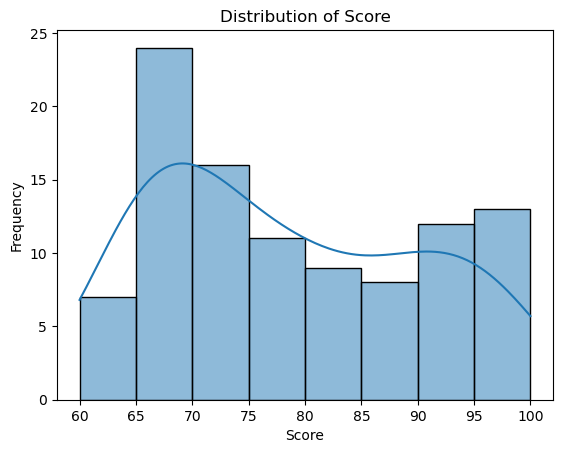

In [12]:
# ヒストグラムの作成: scoreの分布を確認
sns.histplot(df['score'], kde=True)
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

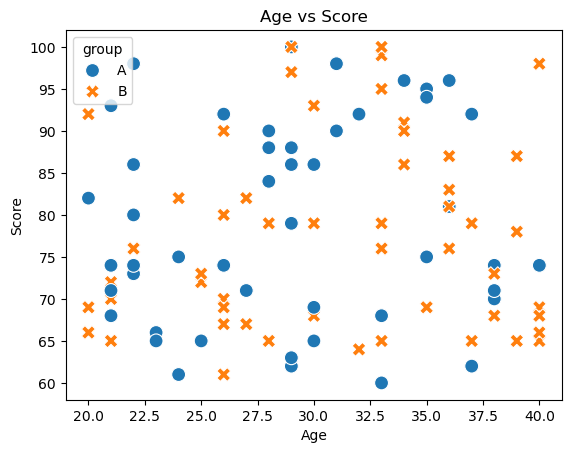

In [13]:
# 散布図の作成: ageとscoreの関係性を確認
sns.scatterplot(x='age', y='score', data=df, hue='group', style='group', s=100)
plt.title("Age vs Score")
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()

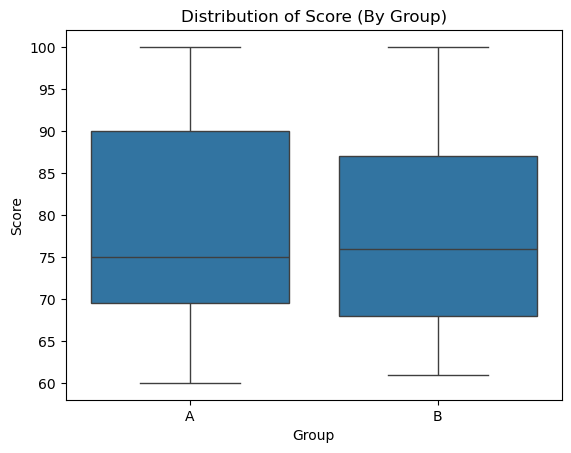

In [14]:
# 箱ひげ図の作成: グループごとのscoreのばらつきと外れ値を確認
sns.boxplot(x='group', y='score', data=df)
plt.title("Distribution of Score (By Group)")
plt.xlabel("Group")
plt.ylabel("Score")
plt.show()

In [18]:
# group Aとgroup Bのscoreデータを抽出
group_A = df[df['group'] == 'A']['score']
group_B = df[df['group'] == 'B']['score']


In [19]:
# 独立2群のt検定を実行
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"t統計量: {t_stat:.3f}")
print(f"p値: {p_value:.3f}")

if p_value < 0.05:
    print("統計的に有意な差があると判断できます。")
else:
    print("統計的に有意な差は認められません。")

t統計量: 0.558
p値: 0.578
統計的に有意な差は認められません。
